## Carga de librerias

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from mlxtend.frequent_patterns import apriori #libreria que implementa el algoritmo apriori (para buscar relaciones frecuentes de categorias dada una 
#determinada estructura de datos)
#Library: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
#Usage/installation: https://rasbt.github.io/mlxtend/installation/

%matplotlib inline

## Lectura de los datos, vistazo general a sus estructuras y algunos ajustes a las mismas.

In [2]:
applications = pd.read_csv('Data/fiuba_4_postulaciones.csv') #postulaciones hasta el 1ro de marzo 2018
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [3]:
applications.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


- Cambiamos a datetime la columna fechapostulacion para poder ordenar y procesar luego

In [4]:
applications['fechapostulacion'].hasnans #antes de transformar el tipo de dato vemos si hay algun nulo que pueda ocasionar problemas en la transformacion

False

In [5]:
applications['fechapostulacion'] = pd.to_datetime(applications['fechapostulacion']) #transformamos
applications.info() #chequeamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.9+ MB


In [6]:
# Veamos que periodo de tiempo abarcan los datos de postulaciones
print(applications['fechapostulacion'].nsmallest(1))
print(applications['fechapostulacion'].nlargest(1))

1525012   2018-01-15 00:00:01
Name: fechapostulacion, dtype: datetime64[ns]
752901   2018-02-28 23:59:55
Name: fechapostulacion, dtype: datetime64[ns]


- Vemos que tenemos datos desde mediados de enero hasta fin de febrero

In [7]:
views = pd.read_csv('Data/fiuba_3_vistas.csv')
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [8]:
views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [9]:
def normalize_str(date_str):
    return (date_str[:10]+' '+date_str[11:19])
    
views['timestamp'] = views['timestamp'].apply(normalize_str)

In [10]:
# cambiamos timestamp a datetime
views['timestamp'].hasnans #antes de transformar el tipo de dato vemos si hay algun nulo que pueda ocasionar problemas en la transformacion

False

In [11]:
# transformamos
views['timestamp'] = pd.to_datetime(views['timestamp'])
views.info() #chequeamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null datetime64[ns]
idpostulante    961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB


In [12]:
views.sort_values('timestamp') # Vemos que solo tenemos datos del 23 Feb al 28 de Feb

,idAviso,timestamp,idpostulante
2373,1112306500,2018-02-23 13:38:10,vVjdNMQ
1692,1112349336,2018-02-23 13:38:12,Dr6e6Xl
1691,1111534068,2018-02-23 13:38:12,PmGJAva
1352,1112316239,2018-02-23 13:38:12,xkpOLR0
1041,1112302480,2018-02-23 13:38:12,2zP3R2o
2030,1112206678,2018-02-23 13:38:13,4rWQA6A
2029,1112281208,2018-02-23 13:38:13,A3XpdEL
0,1111780242,2018-02-23 13:38:13,YjVJQ6Z
351,1112306500,2018-02-23 13:38:13,vVjdNMQ
352,1111534068,2018-02-23 13:38:14,PmGJAva


In [13]:
user_age_gender = pd.read_csv('Data/fiuba_2_postulantes_genero_y_edad.csv')
user_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [14]:
# Intuimos que la columna sexo puede transformarse a tipo categorica por su acotado rango de valores
user_age_gender['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [15]:
# Mejoramos el uso de memoria convirtiendo a tipo categorica la columna de sexo
user_age_gender['sexo'] = user_age_gender['sexo'].astype('category')
# Chequeamos
user_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null category
dtypes: category(1), object(2)
memory usage: 3.3+ MB


In [16]:
# Podemos transformar las fechas a datetime. Antes vemos si hay nans
user_age_gender['fechanacimiento'].hasnans

True

In [17]:
# Si hay algun Nan en idpostulante o fechanacimiento, descartamos ese row
user_age_gender = user_age_gender.dropna(subset=['idpostulante','fechanacimiento'])

# Chequeamos
user_age_gender['fechanacimiento'].hasnans, user_age_gender['fechanacimiento'].count()

(False, 196138)

In [18]:
# En este paso, anteriormente intentamos transformar a datetime pero obtuvimos un error por fechas invalidas. Luego, seteamos errors='coerce' para que parsee
# esos casos con NaT, y luego los descartamos.
user_age_gender['fechanacimiento'] = pd.to_datetime(user_age_gender['fechanacimiento'], errors='coerce', format='%Y-%m-%d')
user_age_gender = user_age_gender.dropna(subset=['fechanacimiento'])

# Chequeamos
user_age_gender['fechanacimiento'].hasnans

False

In [19]:
# Hacemos un filtrado bruto de fechas extranias (a nuestro criterio arbitrario)
user_age_gender = user_age_gender[(user_age_gender['fechanacimiento'].dt.year > 1920) & (user_age_gender['fechanacimiento'].dt.year < 2010)]

In [20]:
user_age_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196129 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196129 non-null object
fechanacimiento    196129 non-null datetime64[ns]
sexo               196129 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.7+ MB


In [21]:
user_education = pd.read_csv('Data/fiuba_1_postulantes_educacion.csv')
user_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [22]:
user_education = user_education.rename(columns={'nombre':'estudios'})

In [23]:
#Intuimos que podemos convertir a categoricas las columnas nombre y estado para ahorrar memoria:
user_education['estudios'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: estudios, dtype: int64

In [24]:
user_education['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

In [25]:
# Borramos los de estado abandonado, no nos aportan al analisis que realizaremos y borramos duplicados, si hubiese.
user_education = user_education[user_education['estado'] != 'Abandonado']
user_education = user_education.drop_duplicates()

In [26]:
#Luego:
user_education['estudios'] = user_education['estudios'].astype('category')
user_education['estado'] = user_education['estado'].astype('category')
#Chequeamos
user_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273005 entries, 0 to 298031
Data columns (total 3 columns):
idpostulante    273005 non-null object
estudios        273005 non-null category
estado          273005 non-null category
dtypes: category(2), object(1)
memory usage: 4.7+ MB


In [27]:
jobs_online = pd.read_csv('Data/fiuba_5_avisos_online.csv') #avisos online al 8 de marzo de 2018
jobs_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [28]:
job_details = pd.read_csv('Data/fiuba_6_avisos_detalle.csv')
job_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [29]:
job_details.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


- Descartamos columnas por su bajo porcentaje de datos sobre todo el data set (no tendria sentido hacer algun analisis con dichas columnas al ser tan poco abarcativas):

    - ciudad                  47 non-null object of 13534 entries
    - mapacalle               872 non-null object of 13534 entries
    

- Descartamos columnas que no van a aportar utilidad a ningun analisis, por lo menos a priori, ya que son datos nada estandarizados y sujetos a entradas de texto subjetivas de cada empelador (titulo y descripcion), o todos iguales (pais).

    - titulo                  13534 non-null object of 13534 entries
    - descripcion             13534 non-null object of 13534 entries
    - idpais                  13534 non-null int64 of 13534 entries

In [30]:
job_details = job_details.drop(columns=['titulo','descripcion','idpais','ciudad','mapacalle'])

In [31]:
job_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 6 columns):
idaviso                 13534 non-null int64
nombre_zona             13534 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(1), object(5)
memory usage: 634.5+ KB


- Intuimos que podemos mejorar el uso en memoria del DF convirtiendo las siguientes columnas a categoricas:

    - tipo_de_trabajo         13534 non-null object of 13534 entries
    - nivel_laboral           13534 non-null object of 13534 entries
    - nombre_zona             13534 non-null object of 13534 entries

In [32]:
job_details['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [33]:
job_details['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [34]:
job_details['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

- Luego, convertimos a categoricas:

In [35]:
job_details['nivel_laboral'] = job_details['nivel_laboral'].astype('category')
job_details['tipo_de_trabajo'] = job_details['tipo_de_trabajo'].astype('category')
job_details['nombre_zona'] = job_details['nombre_zona'].astype('category')
job_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 6 columns):
idaviso                 13534 non-null int64
nombre_zona             13534 non-null category
tipo_de_trabajo         13534 non-null category
nivel_laboral           13534 non-null category
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: category(3), int64(1), object(2)
memory usage: 357.7+ KB


## Cantidad de postulaciones y avisos visitados totales segun hora del dia
- Notas:
    - Postulaciones: se analizan el total de los datos, que van de mediados de mediados de enero hasta fines de marzo, ya que la tendencia se mantiene aun si se hace distincion entre ambos meses.
    - Avisos visitados: se analiza solo el periodo de datos disponible correspondiente al 23-28 de Feb.

- Avisos visitados:
    - Todos los dias:

In [36]:
#todos los dias
working_data = views['timestamp'].dt.hour.value_counts().sort_index()
working_data

0     11966
1      7487
2      4550
3      4445
4      5957
5     18679
6     36364
7     50213
8     60972
9     66168
10    63737
11    56415
12    54704
13    56568
14    59214
15    58042
16    53928
17    51527
18    51656
19    45966
20    44273
21    41101
22    35716
23    22249
Name: timestamp, dtype: int64

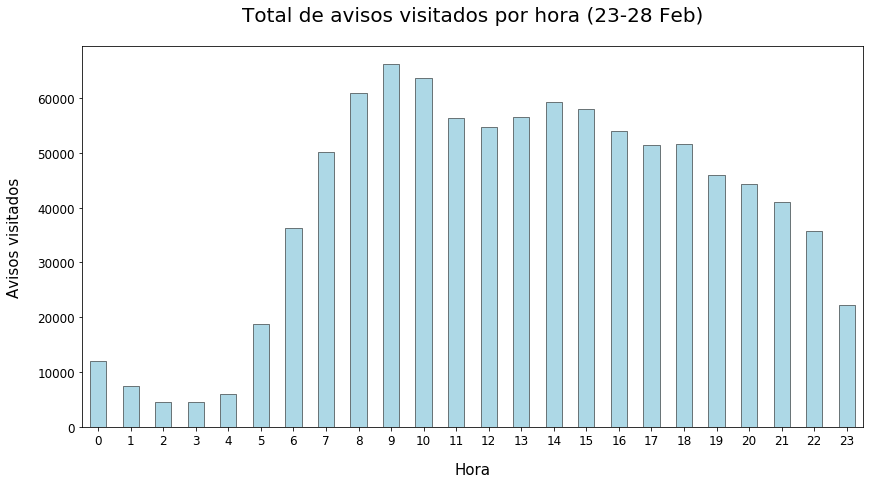

In [37]:
ax = working_data.plot(kind='bar', title='Total de avisos visitados por hora (23-28 Feb)', edgecolor='black', linewidth=0.5, color='lightblue',rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Avisos visitados',labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de avisos visitados por hora (23-28 Feb).png')
plt.show()

- Avisos visitados:
    - Dias de semana:

In [38]:
#Dias de semana
working_data = views[(views['timestamp'].dt.dayofweek < 5)]['timestamp'].dt.hour.value_counts().sort_index()

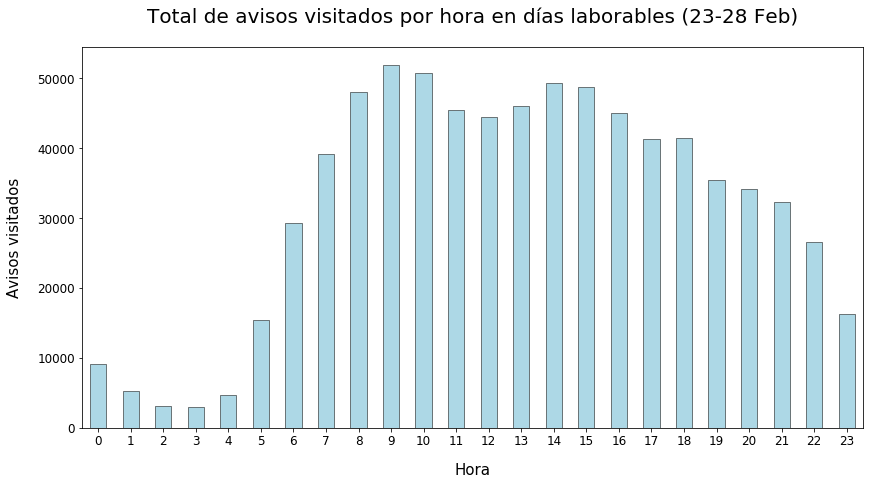

In [39]:
ax = working_data.plot(kind='bar', title='Total de avisos visitados por hora en días laborables (23-28 Feb)', edgecolor='black', linewidth=0.5, color='lightblue', rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Avisos visitados', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de avisos visitados por hora en dias laborables (23-28 Feb).png')
plt.show()

- Avisos visitados:
    - Fines de semana:

In [40]:
#Fin de semana
working_data = views[(views['timestamp'].dt.dayofweek > 4)]['timestamp'].dt.hour.value_counts().sort_index()

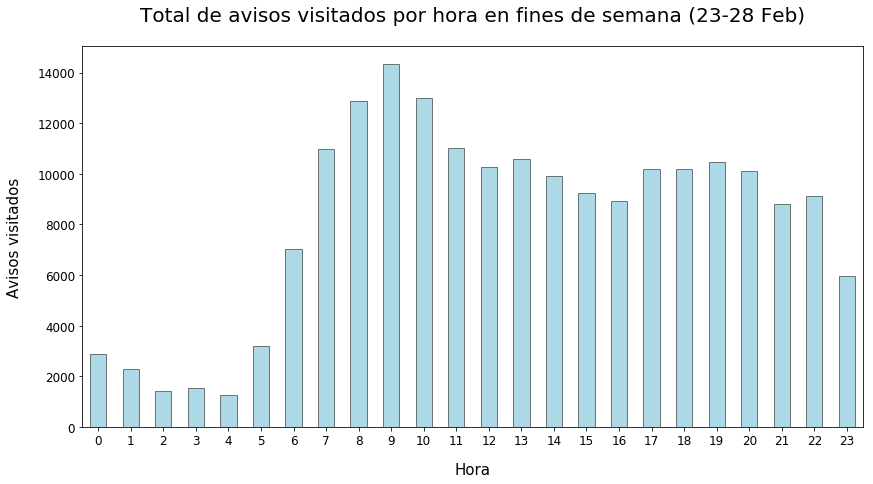

In [41]:
ax = working_data.plot(kind='bar', title='Total de avisos visitados por hora en fines de semana (23-28 Feb)', edgecolor='black', linewidth=0.5, color='lightblue',rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Avisos visitados', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de avisos visitados por hora en fines de semana (23-28 Feb).png')
plt.show()

- Postulaciones:
    - Todos los dias:

In [42]:
#todos los dias
working_data = applications['fechapostulacion'].dt.hour.value_counts().sort_index()
working_data

0      44981
1      27342
2      17336
3      14290
4      20382
5      50375
6     104569
7     167661
8     236547
9     274827
10    257280
11    233871
12    220434
13    220999
14    215492
15    196633
16    181334
17    170380
18    158875
19    145853
20    135252
21    126107
22    106293
23     74510
Name: fechapostulacion, dtype: int64

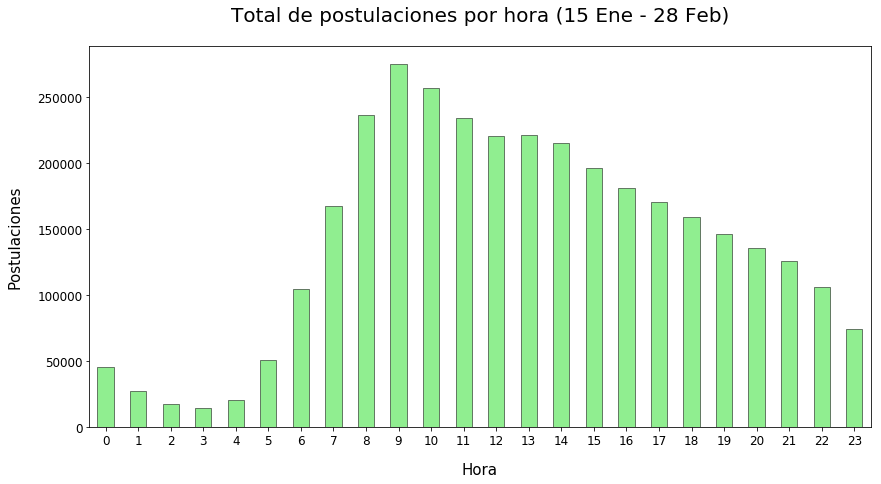

In [43]:
ax = working_data.plot(kind='bar', title='Total de postulaciones por hora (15 Ene - 28 Feb)', edgecolor='black', linewidth=0.5, color='lightgreen',rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Postulaciones',labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de postulaciones por hora (15 Ene - 28 Feb).png')
plt.show()

- Postulaciones:
    - Dias laborables:

In [44]:
#Dias de semana
working_data = applications[(applications['fechapostulacion'].dt.dayofweek < 5)]['fechapostulacion'].dt.hour.value_counts().sort_index()

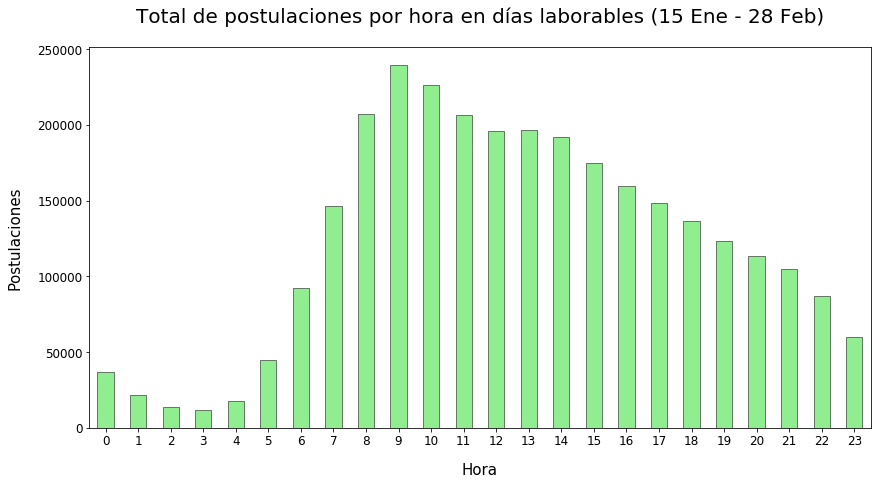

In [45]:
ax = working_data.plot(kind='bar', title='Total de postulaciones por hora en días laborables (15 Ene - 28 Feb)', color='lightgreen', edgecolor='black', linewidth=0.5, rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Postulaciones', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de postulaciones por hora en dias laborables (15 Ene - 28 Feb).png')
plt.show()

- Postulaciones:
    - Fines de semana:

In [46]:
#Fin de semana
working_data = applications[(applications['fechapostulacion'].dt.dayofweek > 4)]['fechapostulacion'].dt.hour.value_counts().sort_index()

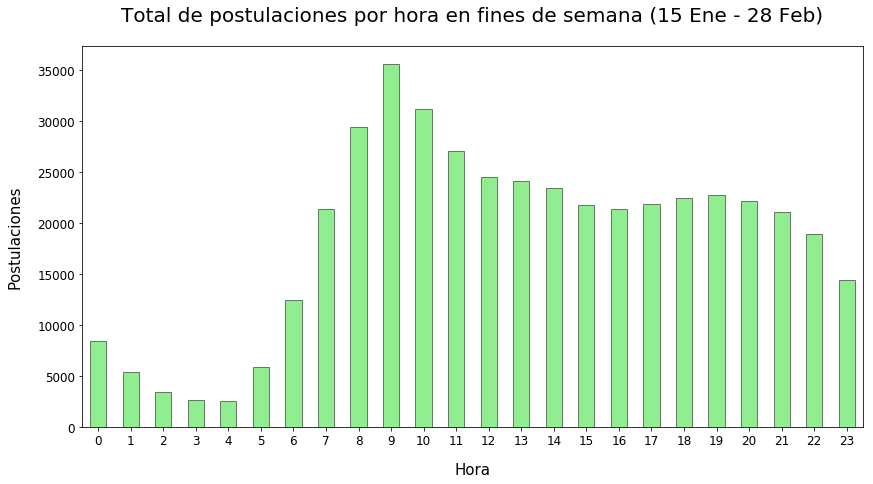

In [47]:
ax = working_data.plot(kind='bar', title='Total de postulaciones por hora en fines de semana (15 Ene - 28 Feb)', color='lightgreen',edgecolor='black', linewidth=0.5, rot=0, width=0.5, figsize=(14,7), fontsize=12)

ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Postulaciones', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de postulaciones por hora en fines de semana (15 Ene - 28 Feb).png')
plt.show()

- Postulaciones:
    - Comparacion entre dias de semana y fines de semana:

In [48]:
working_data = applications[(applications['fechapostulacion'].dt.dayofweek < 5)]['fechapostulacion'].dt.hour.value_counts().sort_index().to_frame()
working_data.columns = ['dias laborables']
working_data['fin de semana'] = applications[(applications['fechapostulacion'].dt.dayofweek > 4)]['fechapostulacion'].dt.hour.value_counts().sort_index()
working_data

,dias laborables,fin de semana
0,36600,8381
1,21960,5382
2,13941,3395
3,11653,2637
4,17839,2543
5,44482,5893
6,92117,12452
7,146307,21354
8,207119,29428
9,239263,35564


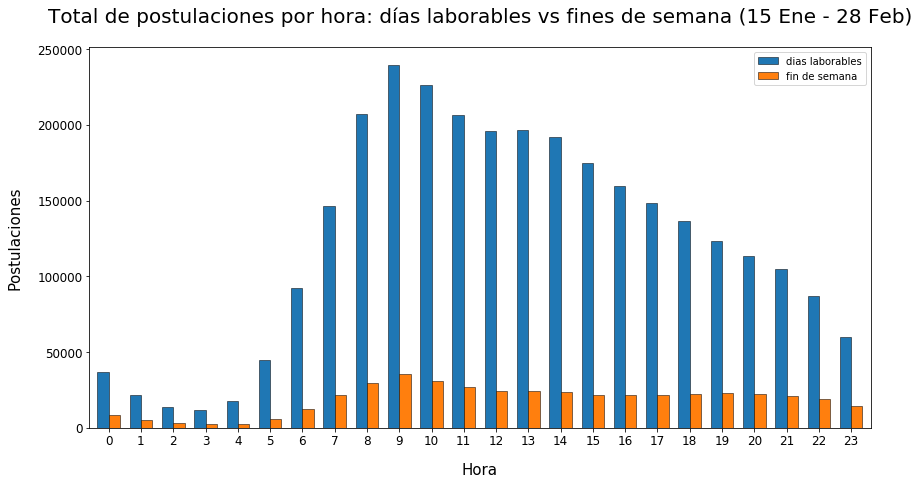

In [49]:
ax = working_data.plot(kind='bar', title='Total de postulaciones por hora: días laborables vs fines de semana (15 Ene - 28 Feb)', edgecolor='black', linewidth=0.5, rot=0, width=0.7, figsize=(14,7), fontsize=12)
ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Postulaciones', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total de postulaciones por hora: dias laborables vs fines de semana (15 Ene - 28 Feb).png')
plt.show()

- Avisos visitados y postulaciones:
    - Comparacion entre ambos para el periodo 23-28 de Feb:

In [50]:
working_data = views['timestamp'].dt.hour.value_counts().sort_index().to_frame()

#Limitamos al periodo 23-28 Feb para igualar al periodo que tenemos de visitas:
working_data['applications'] = applications[(applications['fechapostulacion'].dt.day > 22) & (applications['fechapostulacion'].dt.day < 29) & (applications['fechapostulacion'].dt.month == 2)]['fechapostulacion'].dt.hour.value_counts().sort_index()
working_data.columns = ['avisos visitados', 'postulaciones']

working_data

,avisos visitados,postulaciones
0,11966,7452
1,7487,4398
2,4550,2641
3,4445,2416
4,5957,3200
5,18679,8461
6,36364,16773
7,50213,27677
8,60972,37716
9,66168,43613


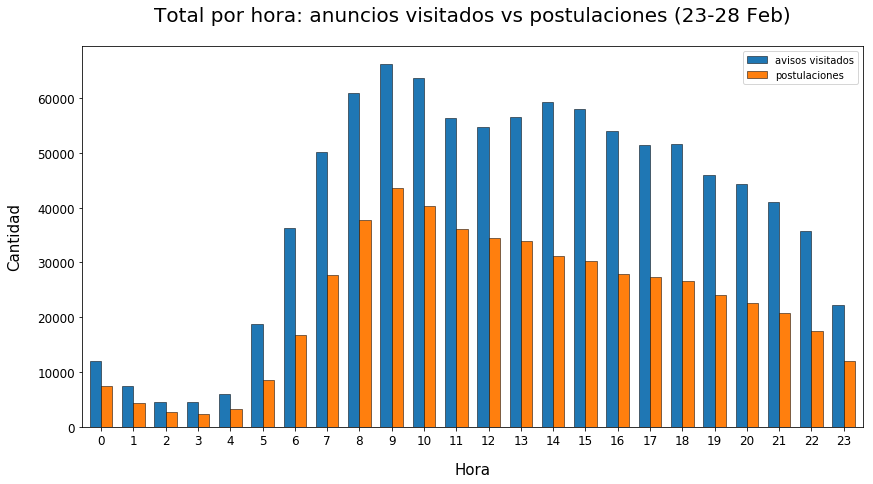

In [51]:
ax = working_data.plot(kind='bar', title='Total por hora: anuncios visitados vs postulaciones (23-28 Feb)', edgecolor='black', rot=0, linewidth=0.5, width=0.7, figsize=(14,7), fontsize=12)
ax.title.set_size(20)
ax.set_xlabel('Hora', labelpad=15, size=15)
ax.set_ylabel('Cantidad', labelpad=15, size=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Total por hora: anuncios visitados vs postulaciones (23-28 Feb).png')
plt.show()

## Cantidad de postulaciones totales segun hora del dia y edad del postulante
- Nota: Se analizan el total de los datos, que van de mediados de mediados de enero hasta fines de marzo, ya que la tendencia se mantiene aun si se hace distincion entre ambos meses    

In [52]:
# La edad la calculamos con respecto a la fecha hasta la que se tienen los datos de postulaciones: 01 de marzo de 2018
def calculate_age(birth_date):
    return (2018 - birth_date.year - ((3, 1) < (birth_date.month, birth_date.day))) # El ultimo termino resta un anio si cumple despues del dia y mes de referencia

user_age_gender['age'] = user_age_gender['fechanacimiento'].apply(calculate_age).astype('int8')

In [53]:
# Filtramos a las edades del analisis que realizaremos (edad laborable estandar: 18 a 64)
user_age_gender = user_age_gender[(user_age_gender['age'] > 17) & (user_age_gender['age'] < 65)]

In [54]:
# Integramos con dato de postulaciones
working_data = applications[['idpostulante','fechapostulacion']].merge(user_age_gender[['idpostulante','age']], how='inner', on='idpostulante').reset_index(drop=True)

In [55]:
working_data.head()

,idpostulante,fechapostulacion,age
0,NM5M,2018-01-15 16:22:34,47
1,NM5M,2018-02-06 09:04:50,47
2,NM5M,2018-02-22 09:04:47,47
3,NM5M,2018-02-22 09:04:59,47
4,5awk,2018-01-25 18:55:03,55


In [56]:
working_data = pd.crosstab(working_data['fechapostulacion'].dt.hour, working_data['age'])

In [57]:
working_data.head()

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
fechapostulacion,,,,,,,,,,,,,,,,,,,,,
0,1147,2144,2658,3193,3235,3409,3341,2924,2824,2625,...,18,53,22,37,19,12,1,2,0,1
1,699,1385,1623,1894,2205,1953,2007,1796,1718,1907,...,13,6,3,7,2,10,3,0,0,1
2,659,907,983,1128,1153,1423,1134,841,1171,1333,...,0,17,0,6,1,0,0,0,2,0
3,406,541,740,800,946,1153,907,812,834,1074,...,5,12,16,8,5,3,0,1,1,3
4,373,486,680,840,1010,1153,933,1070,1414,1552,...,21,39,22,21,30,34,3,1,5,2


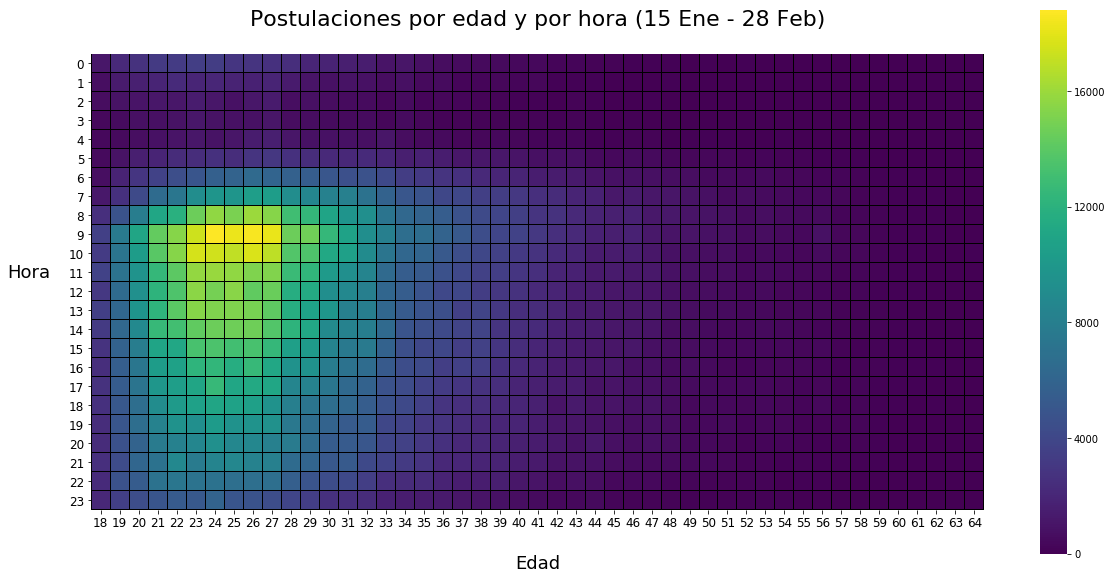

In [58]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.heatmap(working_data, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black', square=True)
g.set_title("Postulaciones por edad y por hora (15 Ene - 28 Feb)", fontsize=22)
g.set_xlabel("Edad", fontsize=18, labelpad=25)
g.set_ylabel("Hora", fontsize=18, labelpad=40, rotation=0)
g.set_xticklabels(g.get_xticklabels(), fontsize=12)
g.set_yticklabels(g.get_yticklabels(), fontsize=12, rotation=0)

g.title.set_position([0.5, 1.05])

plt.savefig('Postulaciones por edad y por hora (15 Ene - 28 Feb).png')
plt.show()

- Para poder apreciar mejor las diferencias relativas entre las categorias, graficamos en escala logaritmica:

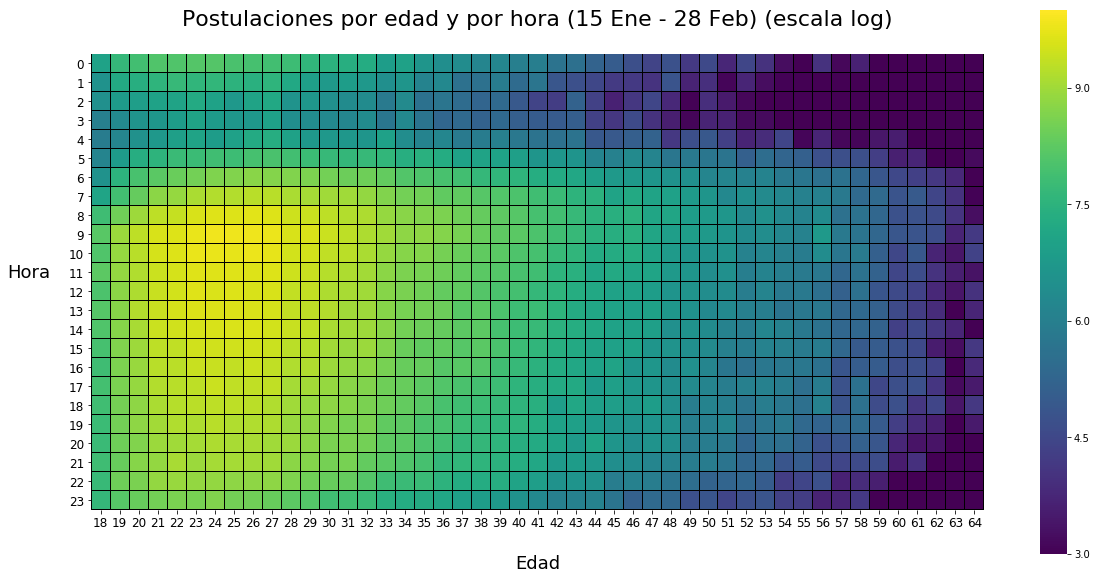

In [59]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.heatmap(np.log(working_data+1), cmap="viridis", ax=ax, linewidths=0.005, linecolor='black', square=True, vmin=3, vmax=10)
g.set_title("Postulaciones por edad y por hora (15 Ene - 28 Feb) (escala log)", fontsize=22)
g.set_xlabel("Edad", fontsize=18, labelpad=25)
g.set_ylabel("Hora", fontsize=18, labelpad=40, rotation=0)
g.set_xticklabels(g.get_xticklabels(), fontsize=12)
g.set_yticklabels(g.get_yticklabels(), fontsize=12, rotation=0)

g.title.set_position([0.5, 1.05])

plt.savefig('Postulaciones por edad y por hora (15 Ene - 28 Feb) (escala log).png')
plt.show()

## Analisis del nivel laboral de las postulaciones segun la educacion de los postulantes
- Integracion de las postulaciones con la educacion del postulante, y con el nivel de trabajo del aviso.
- Vamos eliminando columnas que no nos interesan para el analisis puntual que estamos haciendo en este momento.

In [60]:
working_data = applications.merge(job_details[['idaviso','nivel_laboral']], on='idaviso')
working_data = working_data.merge(user_education[['idpostulante','estudios', 'estado']], on='idpostulante')
working_data = working_data.drop(columns=['fechapostulacion', 'idaviso'])

In [61]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598586 entries, 0 to 4598585
Data columns (total 4 columns):
idpostulante     object
nivel_laboral    category
estudios         category
estado           category
dtypes: category(3), object(1)
memory usage: 83.3+ MB


In [62]:
working_data.head()

,idpostulante,nivel_laboral,estudios,estado
0,NM5M,Otro,Secundario,Graduado
1,NM5M,Senior / Semi-Senior,Secundario,Graduado
2,NM5M,Senior / Semi-Senior,Secundario,Graduado
3,NM5M,Senior / Semi-Senior,Secundario,Graduado
4,1kJqGb,Otro,Universitario,En Curso


In [63]:
# Las rows duplicadas no me suman ningun valor (no me interesa saber las veces que una misma persona se postulo a trabajos de mismo nivel laboral, me interesa
# al nivel que postulo segun su estudio). Luego, las descartamos:
working_data = working_data.drop_duplicates()

In [64]:
working_data.head()

,idpostulante,nivel_laboral,estudios,estado
0,NM5M,Otro,Secundario,Graduado
1,NM5M,Senior / Semi-Senior,Secundario,Graduado
4,1kJqGb,Otro,Universitario,En Curso
5,1kJqGb,Otro,Terciario/Técnico,Graduado
6,1kJqGb,Senior / Semi-Senior,Universitario,En Curso


- Un preview de los datos que me interesan:

In [65]:
pd.crosstab(working_data['nivel_laboral'], working_data['estudios'])

estudios,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
nivel_laboral,,,,,,,
Gerencia / Alta Gerencia / Dirección,38,1017,1821,1657,4932,3097,9221
Jefe / Supervisor / Responsable,68,1494,4590,2815,15527,8272,21849
Junior,117,1716,17720,3760,78898,29479,63443
Otro,60,848,12422,2084,58516,19517,36341
Senior / Semi-Senior,179,3115,22624,6420,100821,39587,82933


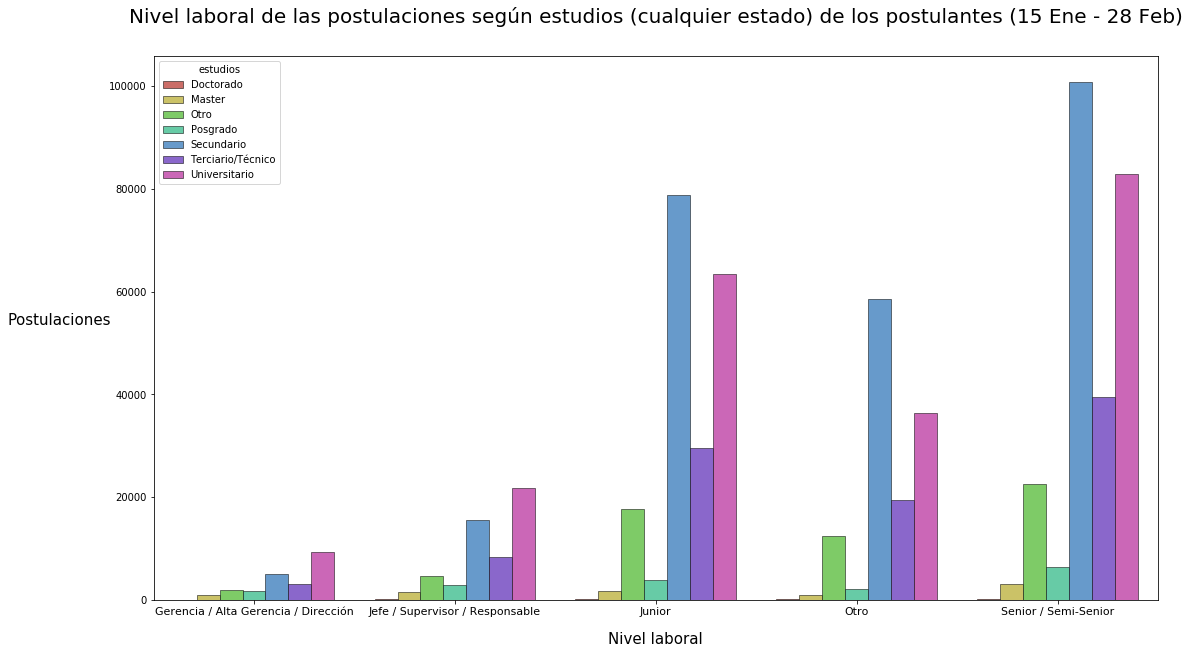

In [66]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='nivel_laboral', hue='estudios', data=working_data, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Nivel laboral de las postulaciones según estudios (cualquier estado) de los postulantes (15 Ene - 28 Feb)', fontsize=20)
g.set_xlabel('Nivel laboral', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Postulaciones', rotation=0, labelpad=50, fontsize=15)

g.title.set_position([0.5, 1.05])

plt.savefig('Nivel laboral de las postulaciones segun estudios (cualquier estado) de los postulantes (15 Ene - 28 Feb).png')
plt.show()

In [67]:
working_data.head()

,idpostulante,nivel_laboral,estudios,estado
0,NM5M,Otro,Secundario,Graduado
1,NM5M,Senior / Semi-Senior,Secundario,Graduado
4,1kJqGb,Otro,Universitario,En Curso
5,1kJqGb,Otro,Terciario/Técnico,Graduado
6,1kJqGb,Senior / Semi-Senior,Universitario,En Curso


In [68]:
# Hagamos distincion ahora de los estudios segun su estado
working_data['estudios'] = working_data['estudios'].astype('str') + ' ' + working_data['estado'].astype('str')
working_data.head()

,idpostulante,nivel_laboral,estudios,estado
0,NM5M,Otro,Secundario Graduado,Graduado
1,NM5M,Senior / Semi-Senior,Secundario Graduado,Graduado
4,1kJqGb,Otro,Universitario En Curso,En Curso
5,1kJqGb,Otro,Terciario/Técnico Graduado,Graduado
6,1kJqGb,Senior / Semi-Senior,Universitario En Curso,En Curso


- Entonces, ahora vemos lo mismo que antes pero con esta distincion entre estudios segun su estado:

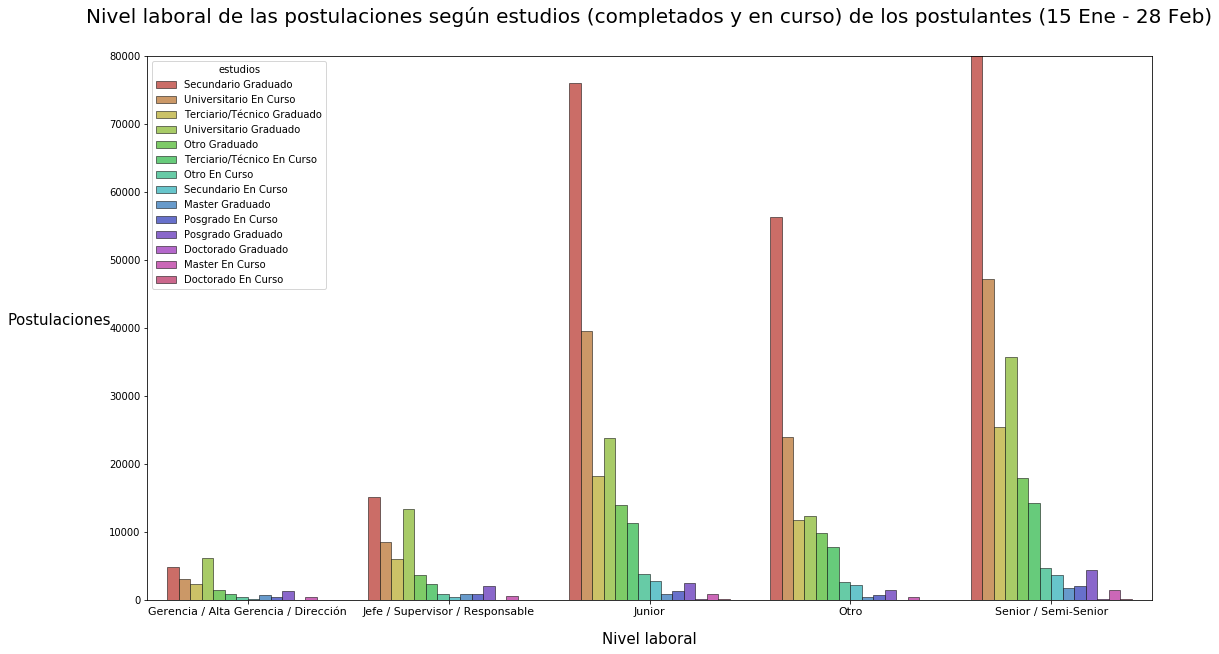

In [69]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='nivel_laboral', hue='estudios', data=working_data, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Nivel laboral de las postulaciones según estudios (completados y en curso) de los postulantes (15 Ene - 28 Feb)', fontsize=20)
g.set_xlabel('Nivel laboral', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Postulaciones', rotation=0, labelpad=50, fontsize=15)

g.title.set_position([0.5, 1.05])

g.set_ybound(upper=80000)

plt.savefig('Nivel laboral de las postulaciones segun estudios (completados y en curso) de los postulantes (15 Ene - 28 Feb).png')
plt.show()

- Sigamos:

In [70]:
user_education = user_education.sort_values('idpostulante')
user_education.head()

,idpostulante,estudios,estado
160274,0z5VvGv,Secundario,Graduado
113674,0zB026d,Secundario,Graduado
113675,0zB026d,Terciario/Técnico,Graduado
113857,0zB03O9,Secundario,Graduado
111205,0zB03O9,Terciario/Técnico,En Curso


- Pero estos datos son datos 'brutos': contemplan varios estudios y estados de una persona simultaneamente.
- Entonces, los limpiamos un poco. Tomaremos una decision de criterio, y vamos a determinar como 'estudio valido actual' del postulante a aquel nivel de estudio mas alto cuyo estado sea 'Graduado':

In [71]:
# Nos quedamos solo con estudios validos segun nuestro criterio, es decir, los efectivamente completados.
user_education = user_education[user_education['estado'] == 'Graduado']

# Borramos si hubiese algun duplicado completo, no nos suma informacion
user_education = user_education.drop_duplicates()

user_education.head()

,idpostulante,estudios,estado
160274,0z5VvGv,Secundario,Graduado
113674,0zB026d,Secundario,Graduado
113675,0zB026d,Terciario/Técnico,Graduado
113857,0zB03O9,Secundario,Graduado
113944,0zB08lq,Secundario,Graduado


In [72]:
# Creo nueva columna indicando el nivel de estudios para filtrar mas facilmente luego
working_list = ['Otro', 'Secundario','Terciario/Técnico', 'Universitario', 'Posgrado', 'Master', 'Doctorado']

user_education['nivel_estudios'] = user_education['estudios'].apply(lambda x: working_list.index(x))

In [73]:
user_education.head()

,idpostulante,estudios,estado,nivel_estudios
160274,0z5VvGv,Secundario,Graduado,1
113674,0zB026d,Secundario,Graduado,1
113675,0zB026d,Terciario/Técnico,Graduado,2
113857,0zB03O9,Secundario,Graduado,1
113944,0zB08lq,Secundario,Graduado,1


In [74]:
#Ordeno por nivel, y ante duplicados me quedo con el de nivel mas alto, como queriamos con nuestro criterio de estudio valido
user_education = user_education.sort_values('nivel_estudios').reset_index(drop=True)

user_education = user_education.drop_duplicates(subset=['idpostulante'], keep='last')

In [75]:
# Comparamos por ejemplo con el df anterior para el id 0zB026d y vemos que nos quedamos con el estudio graduado mas alto
user_education = user_education.sort_values('idpostulante')
user_education.head()

,idpostulante,estudios,estado,nivel_estudios
47339,0z5VvGv,Secundario,Graduado,1
131697,0zB026d,Terciario/Técnico,Graduado,2
99144,0zB03O9,Secundario,Graduado,1
99143,0zB08lq,Secundario,Graduado,1
172317,0zB0NWY,Universitario,Graduado,3


- Ahora con nuestro filtrado ya efectuado, volvemos a analizar el tipo de nivel laboral postulado segun la educacion valida vigente (segun nuestro criterio elegido:

In [76]:
working_data = applications.merge(job_details[['idaviso','nivel_laboral']], on='idaviso')
working_data = working_data.merge(user_education[['idpostulante','estudios']], on='idpostulante')
working_data = working_data.drop(columns=['fechapostulacion', 'idaviso'])

In [77]:
working_data.head()

,idpostulante,nivel_laboral,estudios
0,NM5M,Otro,Secundario
1,NM5M,Senior / Semi-Senior,Secundario
2,NM5M,Senior / Semi-Senior,Secundario
3,NM5M,Senior / Semi-Senior,Secundario
4,1kJqGb,Otro,Terciario/Técnico


In [78]:
# Las rows duplicadas no me suman ningun valor (no me interesa saber las veces que una misma persona se postulo a trabajos de mismo nivel laboral, me interesa
# al nivel que postulo segun su estudio). Luego, las descartamos:
working_data = working_data.drop_duplicates()

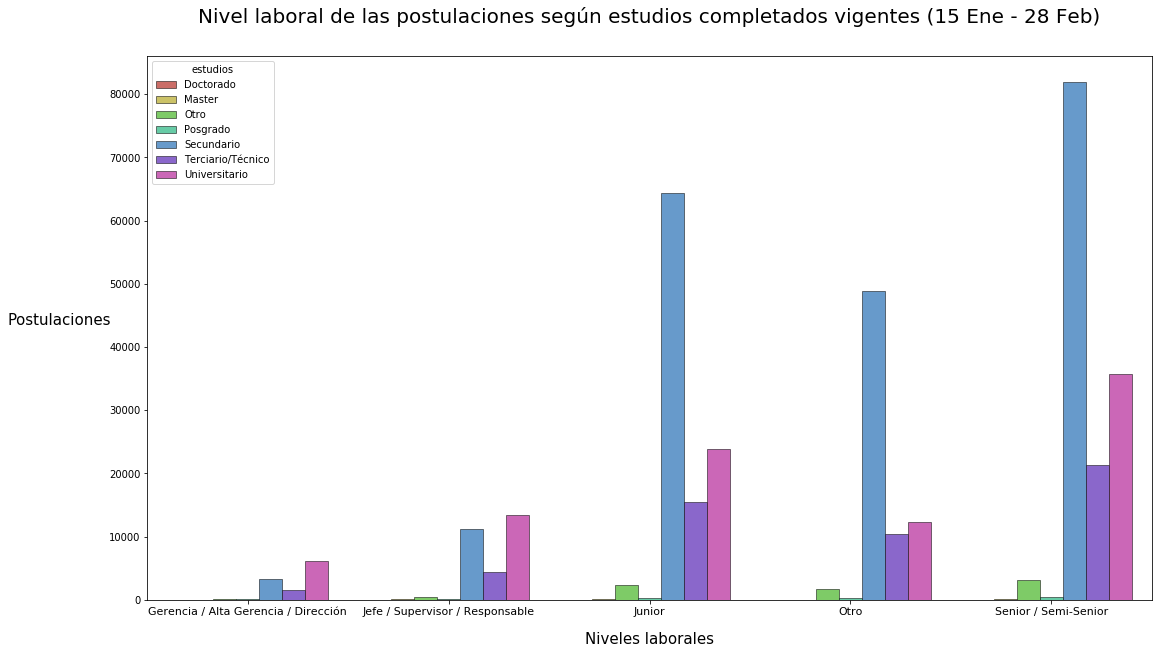

In [79]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='nivel_laboral', hue='estudios', data=working_data, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Nivel laboral de las postulaciones según estudios completados vigentes (15 Ene - 28 Feb)', fontsize=20)
g.set_xlabel('Niveles laborales', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Postulaciones', rotation=0, labelpad=50, fontsize=15)

ax.title.set_position([0.5, 1.05])

plt.savefig('Nivel laboral de las postulaciones segun estudios completados vigentes (15 Ene - 28 Feb).png')
plt.show()

- Ahora para unicamente los estudios completados, queremos ver la misma informacion pero con el enfoque inverso: para cada tipo de estudio que tienen los postulantes, a que niveles laborales aplican.
- Obtenemos los totales para poder calcular luego el porcentaje de c/u:

In [80]:
sum_per_each = pd.crosstab(working_data['nivel_laboral'], working_data['estudios']).sum().to_frame().T
sum_per_each

estudios,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
0,41,318,7898,1313,209887,53224,91527


In [81]:
working_data = pd.crosstab(working_data['estudios'], working_data['nivel_laboral'])
working_data

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
estudios,,,,,
Doctorado,3,6,8,4,20
Master,33,55,72,27,131
Otro,166,504,2384,1717,3127
Posgrado,102,176,302,220,513
Secundario,3356,11238,64454,48911,81928
Terciario/Técnico,1552,4411,15545,10358,21358
Universitario,6205,13405,23873,12373,35671


In [82]:
# Lo pasamos a porcentaje para ver el % de gente que aplica a cada nivel segun cada estudio
for index, row in working_data.iterrows():
    working_data.loc[[index],:] = working_data.loc[[index],:].apply(lambda x: x / sum_per_each.at[0, index] * 100)

working_data

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
estudios,,,,,
Doctorado,7.317073,14.634146,19.512195,9.756098,48.780488
Master,10.377358,17.295597,22.641509,8.490566,41.194969
Otro,2.101798,6.381362,30.184857,21.739681,39.592302
Posgrado,7.768469,13.404417,23.000762,16.755522,39.070830
Secundario,1.598956,5.354310,30.708905,23.303492,39.034338
Terciario/Técnico,2.915978,8.287615,29.206749,19.461145,40.128513
Universitario,6.779420,14.645951,26.083014,13.518415,38.973199


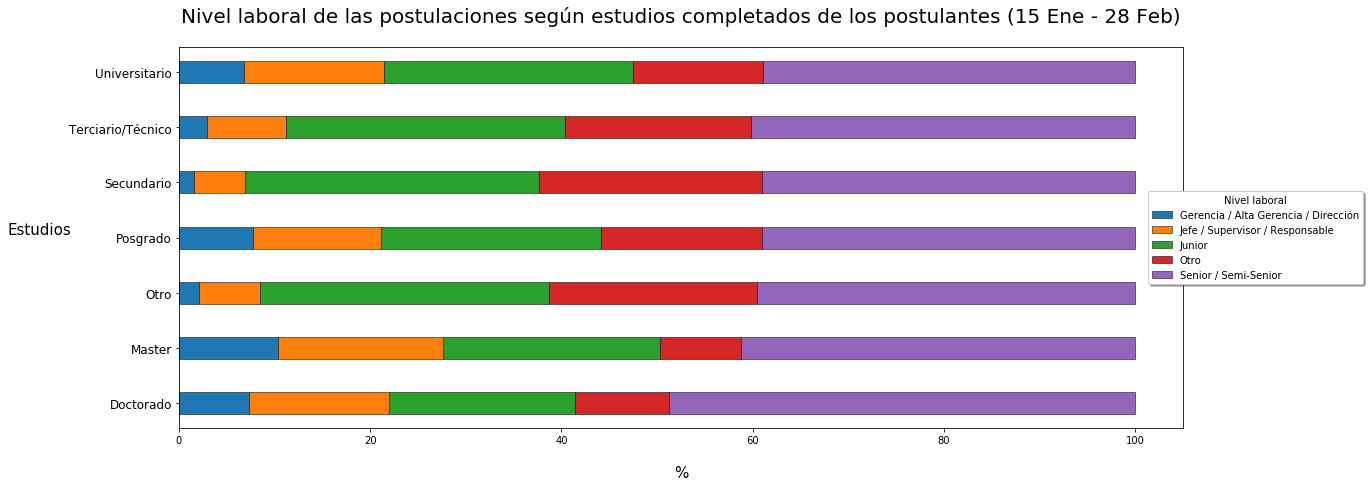

In [83]:
ax = working_data.plot(kind='barh', stacked=True, figsize=(18,7), edgecolor='black', linewidth=0.5, width=0.4)

ax.set_title('Nivel laboral de las postulaciones según estudios completados de los postulantes (15 Ene - 28 Feb)', fontsize=20)

ax.set_ylabel('Estudios', rotation=0, labelpad=30, fontsize=15)
ax.set_xlabel('%', rotation=0, labelpad=20, fontsize=15)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

ax.legend(loc='center left', bbox_to_anchor=(0.96, 0.5), ncol=1, fancybox=True, shadow=True, title='Nivel laboral')

ax.title.set_position([0.5, 1.05])

plt.savefig('Nivel laboral de las postulaciones según estudios completados de los postulantes (15 Ene - 28 Feb).png')
plt.show()

## Analisis del nivel de relacion entre las distintias categorias de las postulaciones

 - Vamos a analizar la relacion entre las categorias a las que se postulan los usuarios. Esto lo realizaremos buscando la repeticion de duplas de categorias a las que
se postulo una misma persona mediante un algoritmo llamado Apriori (https://en.wikipedia.org/wiki/Apriori_algorithm), utilizado generalmente para detectar las n-uplas de productos mas frecuentes compradas en una misma transaccion por clientes en una tienda comercial.


In [84]:
# Mergeo las postulaciones con los detalles de los avisos para tener la categoria:
working_data = applications.merge(job_details[['idaviso','nombre_area']], on='idaviso')

# No voy a usar estas columnas:
working_data = working_data.drop(columns=['idaviso','fechapostulacion'])

# No me interesa cuantas veces se postulo una misma persona a un mismo area, solo a que areas distintas se postulo:
working_data = working_data.drop_duplicates(['idpostulante','nombre_area']).sort_values(['idpostulante'])

In [85]:
working_data.head()

,idpostulante,nombre_area
2263800,0z5VvGv,Promotoras/es
2898,0z5VvGv,Telemarketing
2726822,0z5VvGv,Data Entry
1495293,0z5VvGv,Ventas
612350,0z5VvGv,Comercial


In [86]:
# Llevamos los datos a una matriz de postulantes y categorias, formato requerido por la libreria para aplicar el algoritmo apriori:
working_data = pd.crosstab(working_data['idpostulante'], working_data['nombre_area'])

In [87]:
# Tenemos los datos presentados de la forma que requiere la libreria para aplicar el algoritmo apriori
working_data.head()

nombre_area,Abastecimiento,Administracion de Seguros,Administración,Administración de Base de Datos,Administración de Personal,Almacén / Depósito / Expedición,Análisis Funcional,Análisis de Riesgos,Apoderado Aduanal,Arquitectura,...,Topografía,Trabajo Social,Traduccion,Transporte,Turismo,Urbanismo,Venta de Seguros,Ventas,Ventas Internacionales/Exportación,Veterinaria
idpostulante,,,,,,,,,,,,,,,,,,,,,
0z5VvGv,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
0zB026d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0zB03O9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0zB08lq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0zB0NWY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198479 entries, 0z5VvGv to zvxzrWm
Columns: 163 entries, Abastecimiento to Veterinaria
dtypes: int64(163)
memory usage: 248.3+ MB


In [89]:
# Reducimos uso de memoria (es una matriz de categorias x postulantes, donde cada celda indica si existio o no una postulacion a esa categoria, con 1 o 0)
working_data = working_data.astype('bool')
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198479 entries, 0z5VvGv to zvxzrWm
Columns: 163 entries, Abastecimiento to Veterinaria
dtypes: bool(163)
memory usage: 32.4+ MB


In [90]:
# Algoritmo apriori para detectar las n-uplas de categorias mas frecuentes a las que un mismo postulante se postula. En este caso para el analisis
# usamos max_len=2 asi limitamos al algoritmo a tomar como maximo 2-uplas (duplas). Usamos un soporte minimo (frecuencia de aparicion sobre el total 
# de registros) min_support=0.0 para que muestre todas las duplas posibles:
apriori_result = apriori(working_data, min_support=0.0, use_colnames=True, max_len=2)

In [91]:
apriori_result.head()

,support,itemsets
0,0.042110,[Abastecimiento]
1,0.017231,[Administracion de Seguros]
2,0.322503,[Administración]
3,0.002328,[Administración de Base de Datos]
4,0.096111,[Administración de Personal]


- Voy a guardarme un DF que contenga solo el soporte individual de cada categoria para consultarlo luego:

In [92]:
# Armo el DF con los soportes de las categorias individuales (length de la lista itemsets = 1 )
support_per_category = apriori_result[apriori_result['itemsets'].apply(lambda x: len(x) == 1)]

support_per_category = support_per_category.rename(columns={'itemsets':'category'})

support_per_category['category'] = support_per_category['category'].apply(lambda x: x[0])

In [93]:
support_per_category.head()

,support,category
0,0.042110,Abastecimiento
1,0.017231,Administracion de Seguros
2,0.322503,Administración
3,0.002328,Administración de Base de Datos
4,0.096111,Administración de Personal


In [94]:
# Lo que quiero es fijar cada categoria como una columna para referenciarla directamente luego cuando necesite el soporte individual de c/u
support_per_category = support_per_category.set_index('category').T

In [95]:
support_per_category.head()

category,Abastecimiento,Administracion de Seguros,Administración,Administración de Base de Datos,Administración de Personal,Almacén / Depósito / Expedición,Análisis Funcional,Análisis de Riesgos,Apoderado Aduanal,Arquitectura,...,Topografía,Trabajo Social,Traduccion,Transporte,Turismo,Urbanismo,Venta de Seguros,Ventas,Ventas Internacionales/Exportación,Veterinaria
support,0.04211,0.017231,0.322503,0.002328,0.096111,0.123529,0.015261,0.016899,0.002413,0.013347,...,0.000005,0.000438,0.000005,0.047375,0.016495,0.00006,0.016798,0.445538,0.022879,0.000469


In [96]:
# Ahora trabajo y me quedo solo con el soporte de las duplas (length de la lista itemsets = 2).
apriori_result = apriori_result[apriori_result['itemsets'].apply(lambda x: len(x) == 2)]

In [97]:
apriori_result.head()

,support,itemsets
163,0.001713,"[Abastecimiento, Administracion de Seguros]"
164,0.018743,"[Abastecimiento, Administración]"
165,0.000307,"[Abastecimiento, Administración de Base de Datos]"
166,0.008379,"[Abastecimiento, Administración de Personal]"
167,0.025272,"[Abastecimiento, Almacén / Depósito / Expedición]"


In [98]:
# Ordenamos por soporte
apriori_result = apriori_result.sort_values('support',ascending=False)
apriori_result.head()

,support,itemsets
3910,0.263630,"[Comercial, Ventas]"
2337,0.232881,"[Atención al Cliente, Ventas]"
2201,0.193078,"[Atención al Cliente, Comercial]"
643,0.183218,"[Administración, Ventas]"
507,0.171887,"[Administración, Comercial]"


In [99]:
# Reseteamos index
apriori_result = apriori_result.reset_index(drop=True)
apriori_result.head()

,support,itemsets
0,0.263630,"[Comercial, Ventas]"
1,0.232881,"[Atención al Cliente, Ventas]"
2,0.193078,"[Atención al Cliente, Comercial]"
3,0.183218,"[Administración, Ventas]"
4,0.171887,"[Administración, Comercial]"


In [100]:
support_per_category.at['support','Ventas'], support_per_category.at['support','Comercial']

(0.44553831891535123, 0.3650562528025635)

- Esto nos permite por ejemplo una lectura: el 26,3630% de los postulantes se postularon a uno o mas anuncios de categoria Ventas y tambien a uno o mas de Comercial.

- Tambien podemos analizar la proporcion de una dupla sobre una categoria singular (confianza): si calculamos, por ejemplo, el soporte de la dupla [Comercial,Ventas] sobre el soporte individual de Ventas tenemos: 0,263630 / 0,445538 (support_per_category['Ventas']) = 0,591711594. Es decir, que de todas las personas que se postularon para al menos un anuncio de Ventas, el 59,17% tambien se postulo a uno o mas anuncios de Comercial. Respecto a la categoria Comercial seria: 0,263630 / 0,365056 (support_per_category['Comercial']) = 0,722163175. Luego, el 72,32% de las personas que postularon a Comercial, tambien postularon a Ventas. Estos datos resultan muy utiles para ver que otras categorias de anuncios se podrian recomendar a un usuario con antecedentes de postulaciones a cierta otra categoria.

In [101]:
apriori_result.count()

support     13203
itemsets    13203
dtype: int64

In [102]:
# Borramos rows con soporte = 0 (es decir, duplas que no se hayan dado en nuestros datos)
apriori_result = apriori_result[apriori_result['support'] > 0.0]

In [103]:
apriori_result.count()

support     12373
itemsets    12373
dtype: int64

In [104]:
# Vamos a analizar las 50 duplas con mayor soporte (frecuencia de aparicion en los datos analizados)
apriori_result.nlargest(50,'support')

,support,itemsets
0,0.263630,"[Comercial, Ventas]"
1,0.232881,"[Atención al Cliente, Ventas]"
2,0.193078,"[Atención al Cliente, Comercial]"
3,0.183218,"[Administración, Ventas]"
4,0.171887,"[Administración, Comercial]"
5,0.162864,"[Administración, Atención al Cliente]"
6,0.159604,"[Call Center, Ventas]"
7,0.153865,"[Atención al Cliente, Call Center]"
8,0.131072,"[Call Center, Comercial]"
9,0.129243,"[Tesorería, Ventas]"


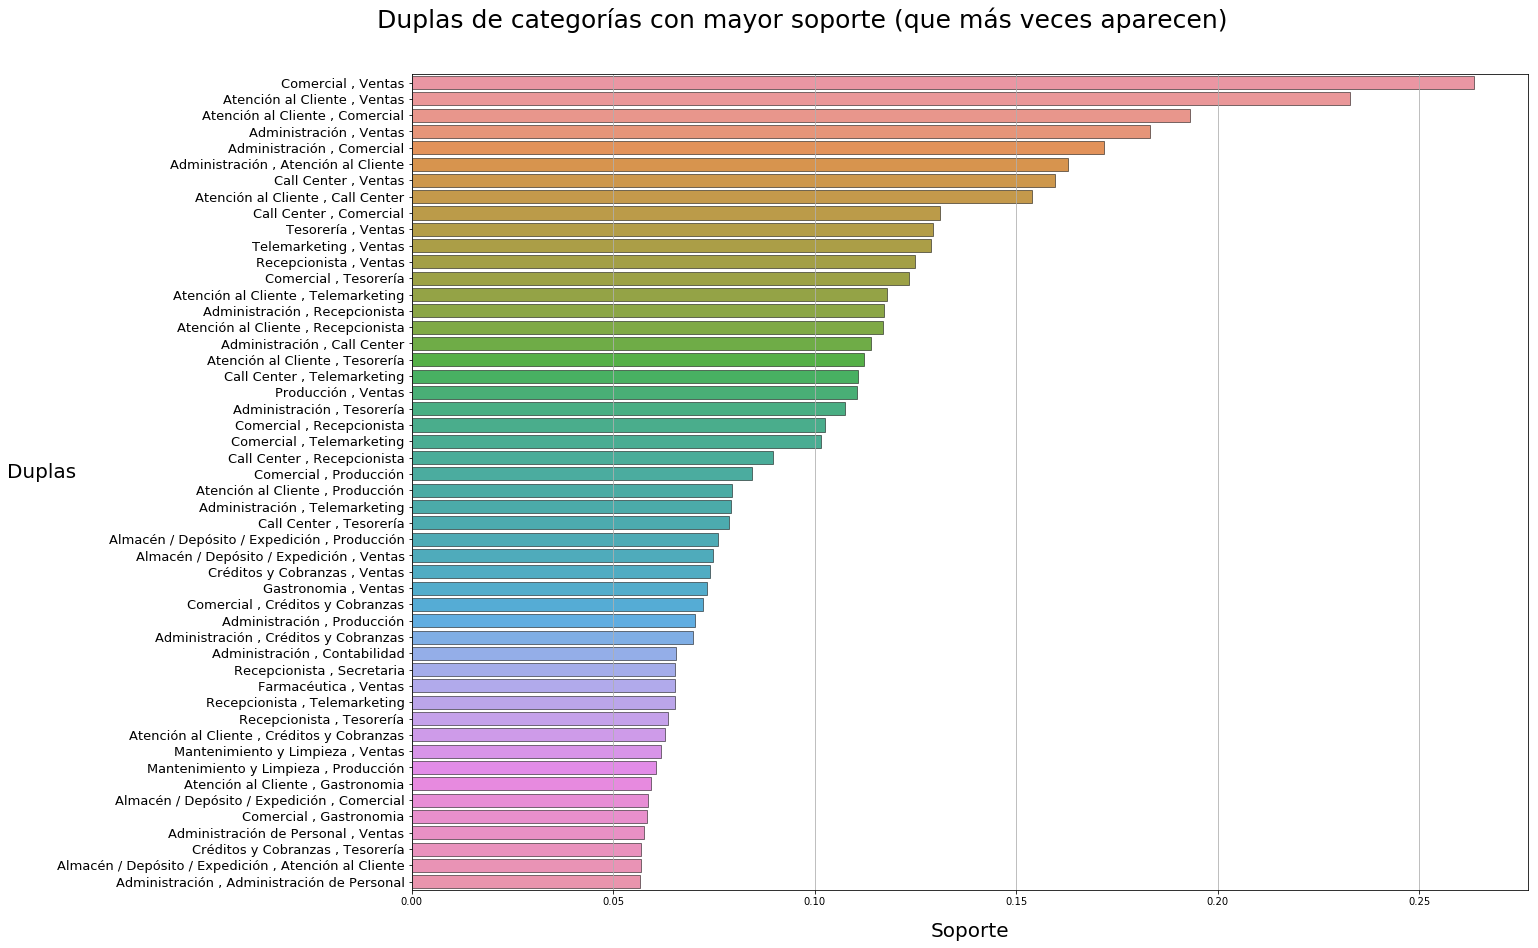

In [105]:
working_data = apriori_result.nlargest(50,'support')

fig, ax = plt.subplots(figsize=(20,15))

ax = sns.barplot(x=working_data['support'], y=(working_data['itemsets'].apply(lambda x: x[0]+' , '+x[1])), orient='h', edgecolor="black", linewidth=0.5)
ax.set_title('Duplas de categorías con mayor soporte (que más veces aparecen)', fontsize=25)
ax.set_xlabel('Soporte', labelpad=15, size=20)
ax.set_ylabel('Duplas', rotation=0, labelpad=15, size=20)
ax.set_yticklabels(ax.get_yticklabels(), size=13)
ax.grid(axis='x')

ax.title.set_position([0.35, 1.05])

plt.savefig('Duplas de categorías con mayor soporte: (mayor aparicion).png')
plt.show()

In [106]:
working_data = apriori_result.rename(columns={'itemsets':'category1'})
working_data['category2'] = working_data['category1'].apply(lambda x: x[1])
working_data['category1'] = working_data['category1'].apply(lambda x: x[0])

In [107]:
working_data.head()

,support,category1,category2
0,0.263630,Comercial,Ventas
1,0.232881,Atención al Cliente,Ventas
2,0.193078,Atención al Cliente,Comercial
3,0.183218,Administración,Ventas
4,0.171887,Administración,Comercial


In [108]:
apriori_result = apriori_result.rename(columns={'itemsets':'category1'})
apriori_result['category2'] = apriori_result['category1'].apply(lambda x: x[0])
apriori_result['category1'] = apriori_result['category1'].apply(lambda x: x[1])

In [109]:
apriori_result.head()

,support,category1,category2
0,0.263630,Ventas,Comercial
1,0.232881,Ventas,Atención al Cliente
2,0.193078,Comercial,Atención al Cliente
3,0.183218,Ventas,Administración
4,0.171887,Comercial,Administración


In [110]:
# Uno los 2 DF:
apriori_result = pd.concat([working_data, apriori_result]).reset_index(drop=True)

In [111]:
apriori_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24746 entries, 0 to 24745
Data columns (total 3 columns):
support      24746 non-null float64
category1    24746 non-null object
category2    24746 non-null object
dtypes: float64(1), object(2)
memory usage: 580.1+ KB


In [112]:
#Calculo de la confianza (la calculamos RESPECTO A LA CATEGORIA CATEGORY1). Esto es support de la dupla dividido support individual de una de las 2 categorias de 
# dicha dupla. Es decir, de las personas que se postularon a la categoria individual, cuantas aplicaron tambien a la otra categoria de la dupla. 
#(vamos a buscar el support individual al DF que teniamos dedicado para eso -support_per_category-, con cada categoria como una columna para mayor facilidad en el acceso)
for index, row in apriori_result.iterrows():
    apriori_result.at[index, 'confidence'] = apriori_result.at[index, 'support'] / support_per_category.at['support', row['category1']]


In [113]:
apriori_result.head()

,support,category1,category2,confidence
0,0.263630,Comercial,Ventas,0.722162
1,0.232881,Atención al Cliente,Ventas,0.720957
2,0.193078,Atención al Cliente,Comercial,0.597735
3,0.183218,Administración,Ventas,0.568114
4,0.171887,Administración,Comercial,0.532979


In [114]:
# Ordenamos para ver cuales son las categorias mas "conectadas/relacionadas" (duplas de mayor confianza)
apriori_result = apriori_result.sort_values('confidence', ascending=False)
apriori_result.head()

,support,category1,category2,confidence
24285,0.000005,Traduccion,Caja,1.0
24377,0.000005,Traduccion,Salud,1.0
24344,0.000005,Topografía,Administración,1.0
24346,0.000005,Traduccion,Tesorería,1.0
24354,0.000005,Traduccion,Comercial,1.0


In [115]:
# Como vemos, al haber duplas en casos de postulaciones totales muy reducidas (soporte muy bajo), nos queda una confianza muy alta, y no es representativo de la realidad.
# Ejemplo: una sola persona se postulo a Traduccion, y esa misma persona se postulo a otro trabajo de Caja (la unica con postulaciones a ambas areas), los que nos
# diria que el 100% de las personas que se postulan a Traduccion se postulan tambien a Caja, y obviamente eso no es asi, por lo que hay que limpar estos casos.
# Por eso vamos a limpiar todas las duplas con support menor a 0.001 (recordemos que el support de la dupla es la frecuencia con la que ocurre que un mismo postulante 
# elija ambas categorias, en este caso por ej el 0.0005 % de los postulantes se postulo a trabajos en Traduccion y Caja)
# Soporte > 0.001 significa que vamos a analizar solo los casos en los que esa dupla ocurra mas de 0.001 x 198479 = 198,479 veces.

In [116]:
apriori_result = apriori_result[apriori_result['support'] > 0.001]

In [117]:
apriori_result.head()

,support,category1,category2,confidence
15569,0.001602,Otras áreas técnicas en salud,Administración,0.963636
13010,0.009684,Cuentas Corrientes,Administración,0.920057
12759,0.014782,Venta de Seguros,Comercial,0.880024
1944,0.003094,Asesoría Legal Internacional,Legal,0.878398
12508,0.031132,Facturación,Administración,0.874965


In [118]:
# Vamos a analizar las 50 duplas con la mayor confianza (de la dupla respecto a category1)
apriori_result.nlargest(50, 'confidence')

,support,category1,category2,confidence
15569,0.001602,Otras áreas técnicas en salud,Administración,0.963636
13010,0.009684,Cuentas Corrientes,Administración,0.920057
12759,0.014782,Venta de Seguros,Comercial,0.880024
1944,0.003094,Asesoría Legal Internacional,Legal,0.878398
12508,0.031132,Facturación,Administración,0.874965
3412,0.001441,Otras áreas técnicas en salud,Recepcionista,0.866667
12555,0.025590,Programación de producción,Producción,0.863335
115,0.033963,Caja,Ventas,0.860700
13560,0.005255,Evaluación Económica,Administración,0.858436
402,0.014319,Venta de Seguros,Ventas,0.852430


In [119]:
apriori_result['tuple'] = apriori_result['category1'] + ' -> ' + apriori_result['category2']

In [120]:
apriori_result.head()

,support,category1,category2,confidence,tuple
15569,0.001602,Otras áreas técnicas en salud,Administración,0.963636,Otras áreas técnicas en salud -> Administración
13010,0.009684,Cuentas Corrientes,Administración,0.920057,Cuentas Corrientes -> Administración
12759,0.014782,Venta de Seguros,Comercial,0.880024,Venta de Seguros -> Comercial
1944,0.003094,Asesoría Legal Internacional,Legal,0.878398,Asesoría Legal Internacional -> Legal
12508,0.031132,Facturación,Administración,0.874965,Facturación -> Administración


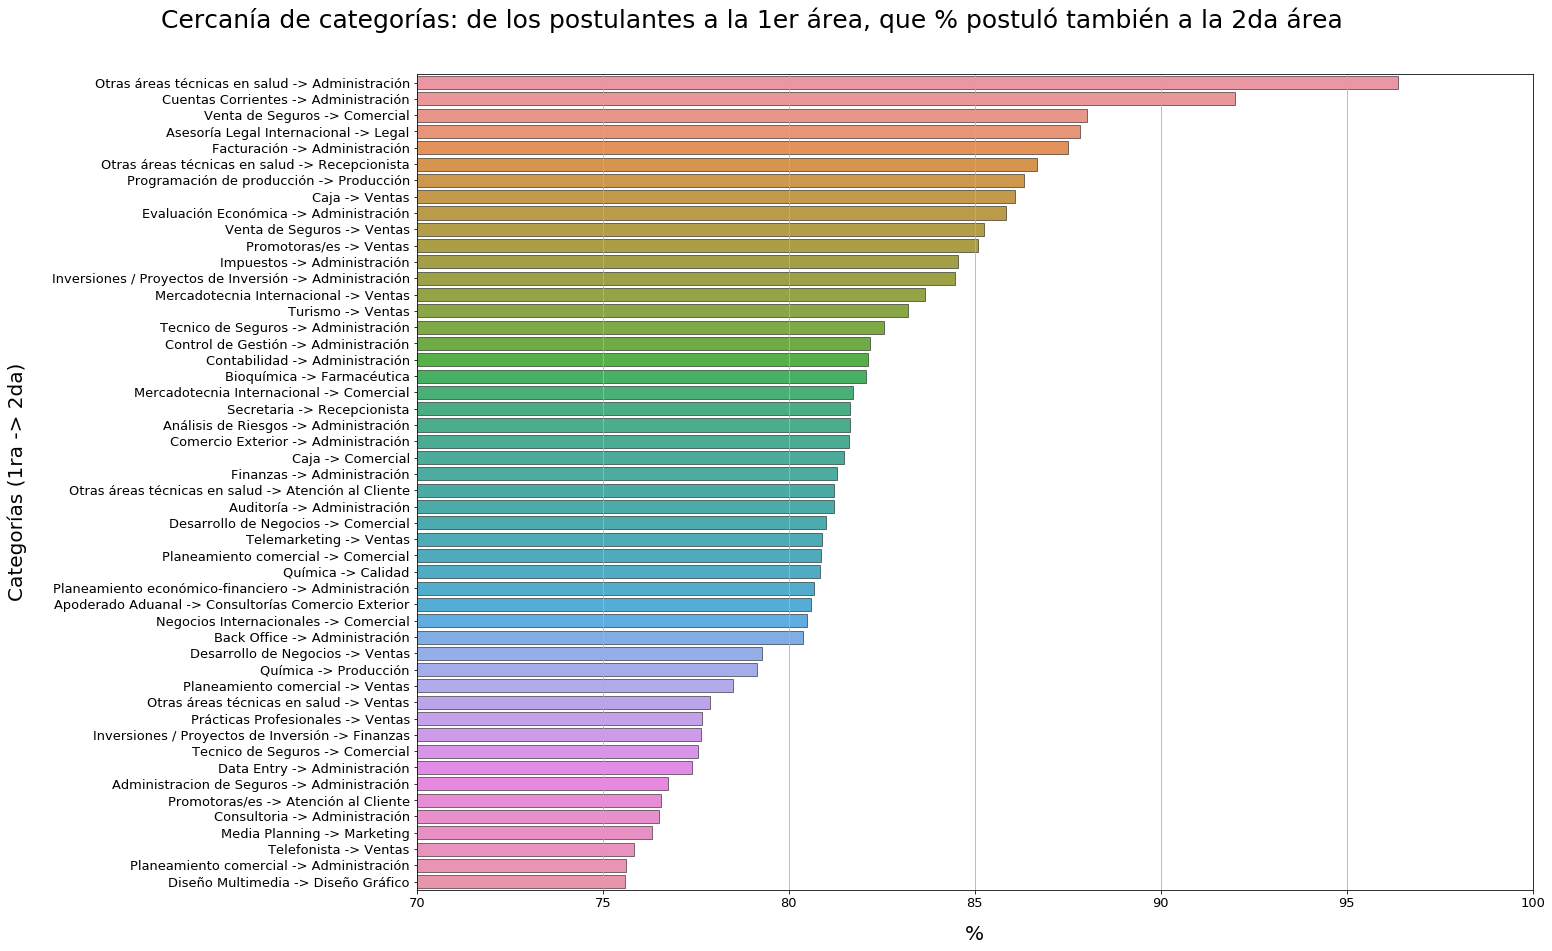

In [121]:
working_data = apriori_result[['tuple','confidence']].nlargest(50,'confidence')

fig, ax = plt.subplots(figsize=(20,15))

ax = sns.barplot(x=working_data['confidence'], y=working_data['tuple'], orient='h', edgecolor="black", linewidth=0.5)
ax.set_title('Cercanía de categorías: de los postulantes a la 1er área, que % postuló también a la 2da área', fontsize=25)
ax.set_xlabel('%', labelpad=15, size=20)
ax.set_ylabel('Categorías (1ra -> 2da)', labelpad=25, size=20)
ax.set_yticklabels(ax.get_yticklabels(), size=13)
ax.grid(axis='x')
#ax.set_xticklabels(['0','20','40','60','80','100'], size=13)
ax.set_xbound(0.7, 1.0)
ax.set_xticklabels(['70','75','80','85','90','95','100'], size=13)

ax.title.set_position([0.3, 1.05])

plt.savefig('Cercanía de categorias - de los postulantes a la 1er área que proporción postuló también a la 2da área.png')
plt.show()

- Como bien pudimos ver (y volvemos a recordar bajo estas lineas), el top 10 de areas frecuentes lo lideran Ventas, Comercial, Atención al Cliente, Administración, y Producción.
- Ahora bien, al ser tan elegidas entre los postulantes, lo que queremos ver es la cercania/conexion que tienen todas las demas areas con respecto a estas 5, y tratar de entender la razon por la que son las mas comunes. Luego, analizaremos el % de gente que habiendo elegido algun otra area, tambien postulo para alguna de estas 5.

In [122]:
support_per_category.T.nlargest(10,'support')

,support
category,
Ventas,0.445538
Comercial,0.365056
Atención al Cliente,0.323017
Administración,0.322503
Producción,0.232307
Call Center,0.216723
Recepcionista,0.186166
Tesorería,0.185707
Telemarketing,0.159301


In [123]:
working_list = ['Producción', 'Administración', 'Atención al Cliente', 'Comercial', 'Ventas']

working_data = apriori_result[apriori_result['category2'].apply(lambda x: x in working_list)]
working_data = pd.pivot_table(working_data, index='category1', columns='category2',values='confidence', fill_value=0.0)
working_data = (working_data*100).astype('int8') # Lo paso a porcentaje para mejor entendimiento en el grafico

In [124]:
working_data

category2,Administración,Atención al Cliente,Comercial,Producción,Ventas
category1,,,,,
Abastecimiento,44,60,60,55,70
Administracion de Seguros,76,61,73,26,71
Administración,0,50,53,21,56
Administración de Base de Datos,69,61,69,0,66
Administración de Personal,58,52,53,34,59
Almacén / Depósito / Expedición,40,46,47,61,60
Análisis Funcional,60,48,57,30,54
Análisis de Riesgos,81,50,73,20,54
Apoderado Aduanal,71,62,62,0,54


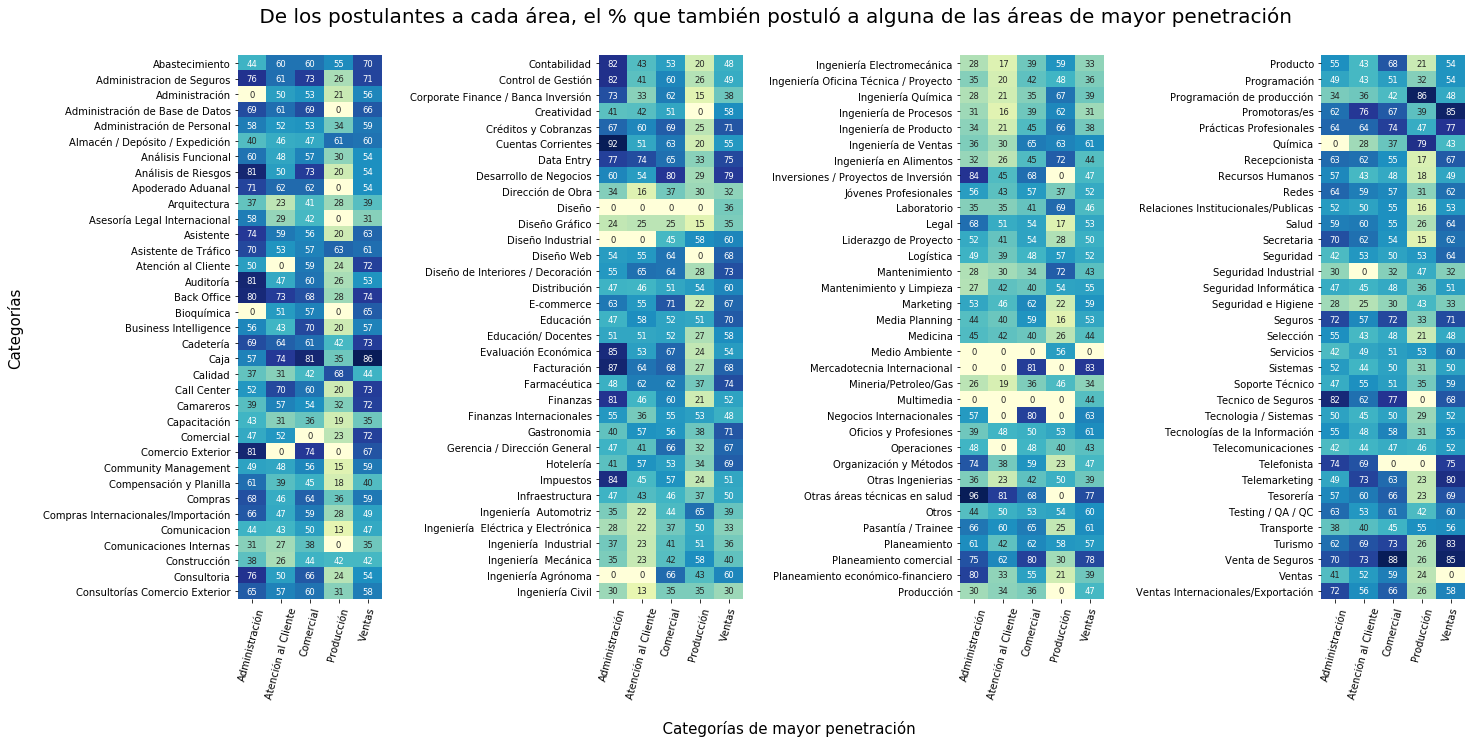

In [125]:
#son 137 rows, dividimos en 4 plots:

fig, (ax,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(22,10))

sns.heatmap(working_data.head(35), cmap="YlGnBu", ax=ax, cbar=False, annot=True, annot_kws={"size": 8.5})

sns.heatmap(working_data.head(69).tail(34), cmap="YlGnBu", ax=ax2, cbar=False, annot=True, annot_kws={"size": 8.5})

sns.heatmap(working_data.head(103).tail(34), cmap="YlGnBu", ax=ax3, cbar=False, annot=True, annot_kws={"size": 8.5})

sns.heatmap(working_data.tail(34), cmap="YlGnBu", ax=ax4, cbar=False, annot=True, annot_kws={"size": 8.5})

ax2.title.set_position([0.5, 1.05])

ax.set_ylabel("Categorías", fontsize=15, labelpad=20)
ax.tick_params(axis='x', rotation=75)
ax.set_xlabel("")

ax2.set_title("                                 De los postulantes a cada área, el % que también postuló a alguna de las áreas de mayor penetración", fontsize=20)
ax2.tick_params(axis='x', rotation=75)
ax2.set_xlabel("                                                  Categorías de mayor penetración", fontsize=15, labelpad=20)
ax2.set_ylabel("")

ax3.tick_params(axis='x', rotation=75)
ax3.set_ylabel("")
ax3.set_xlabel("")

ax4.tick_params(axis='x', rotation=75)
ax4.set_ylabel("")
ax4.set_xlabel("")

plt.subplots_adjust(wspace = 1.5)
plt.savefig('Categorias de mayor penetracion.png')
plt.show()